In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
#import seaborn as sns
#import statsmodels.api as sm
from matplotlib import pyplot as plt
from sci_analysis import analyze

In [28]:
color = {1: 'darkturquoise', 2: 'indigo', 3: 'royalblue', 4: 'mediumorchid'}

In [60]:
df_head = pd.read_fwf('dados/breast-cancer-wisconsin.names')

In [4]:
df = pd.read_csv('dados/breast-cancer-wisconsin.csv', names=['ID','Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 
                                                              'Single_Epithelial_CS', 'Bare_Nucl','Bland_Chromatin','Normal_Nuclei','Mitoses','Class'],
                 )

In [62]:
df.head()

,ID,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_CS,Bare_Nucl,Bland_Chromatin,Normal_Nuclei,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.drop(['ID'], axis=1, inplace=True)

In [6]:
df.describe(include='all')

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_CS,Bare_Nucl,Bland_Chromatin,Normal_Nuclei,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [56]:
pd.api.types.is_string_dtype(df['Bare_Nucl'])

True

In [7]:
df['Bare_Nucl'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare_Nucl, dtype: object

Identificando caracteres únicos

In [8]:
df['Bare_Nucl'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nucl, dtype: int64

Eliminando instancias com caracteres únicos

In [9]:

df = df[df.Bare_Nucl != '?']

In [10]:
df.Bare_Nucl = pd.to_numeric(df.Bare_Nucl, errors='coerce').astype(np.int64)

In [11]:
df.Bare_Nucl.describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare_Nucl, dtype: float64

Verificando a ocorrencia de valores faltantes.

In [12]:
df.isnull().sum()

Clump_Thickness             0
Uniformity_of_Cell_Size     0
Uniformity_of_Cell_Shape    0
Marginal_Adhesion           0
Single_Epithelial_CS        0
Bare_Nucl                   0
Bland_Chromatin             0
Normal_Nuclei               0
Mitoses                     0
Class                       0
dtype: int64

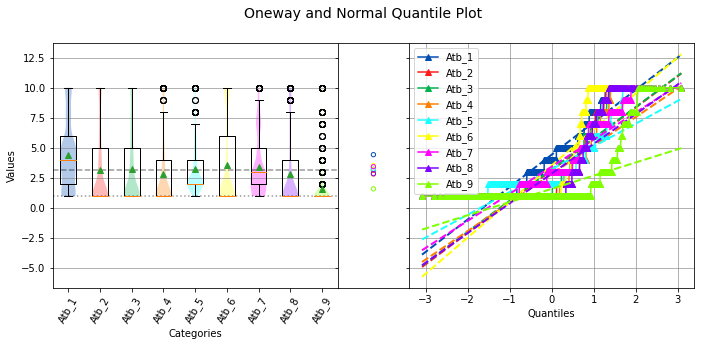



Overall Statistics
------------------

Number of Groups =  9
Total            =  6147
Grand Mean       =  3.1484
Pooled Std Dev   =  2.8093
Grand Median     =  1.0000


Group Statistics
----------------

n             Mean          Std Dev       Min           Median        Max           Group         
--------------------------------------------------------------------------------------------------
683            4.4422        2.8208        1.0000        4.0000        10.0000      Atb_1         
683            3.1508        3.0651        1.0000        1.0000        10.0000      Atb_2         
683            3.2152        2.9886        1.0000        1.0000        10.0000      Atb_3         
683            2.8302        2.8646        1.0000        1.0000        10.0000      Atb_4         
683            3.2343        2.2231        1.0000        2.0000        10.0000      Atb_5         
683            3.5447        3.6439        1.0000        1.0000        10.0000      Atb_6         
68

In [66]:
analyze({'Atb_1': df['Clump_Thickness'], 'Atb_2': df['Uniformity_of_Cell_Size'], 'Atb_3': df['Uniformity_of_Cell_Shape'], 
         'Atb_4':df['Marginal_Adhesion'], 'Atb_5':df['Single_Epithelial_CS'], 'Atb_6':df['Bare_Nucl'], 
         'Atb_7':df['Bland_Chromatin'], 'Atb_8': df['Normal_Nuclei'], 'Atb_9': df['Mitoses']})

Retirando do conjunto a coluna classe (1 - Benigno e 2- Maligno)

In [13]:
df_t = df.drop('Class', axis=1)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(2)

In [16]:
df_trans = pca.fit_transform(df_t)

In [17]:
df_trans.shape

(683, 2)

In [18]:
from sklearn.cluster import KMeans

In [329]:
X = df_t.to_numpy()

Método K-means para 2 clusters.

In [381]:
kmeans_2 = KMeans(n_clusters=2).fit(X)

In [224]:
centros = kmeans_2.cluster_centers_

In [225]:
df_c = pd.DataFrame(np.reshape(centros,(centros.shape[1],centros.shape[0])), columns=['Cluster_1', 'Cluster_2'], index = df_t.columns)

Plotando Centros por Clusters

<AxesSubplot:>

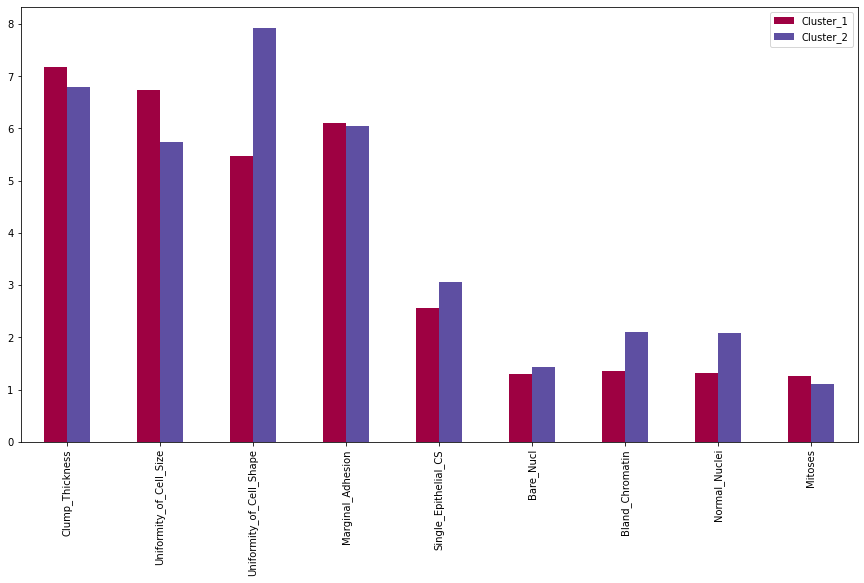

In [286]:
df_c.plot.bar(rot=90, figsize=(15,8), colormap='Spectral', grid=False)

K-means - 3 clusters

In [155]:
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(X)

In [157]:
centros_3 = np.reshape(kmeans_3.cluster_centers_, (kmeans_3.cluster_centers_.shape[1], kmeans_3.cluster_centers_.shape[0]))

In [184]:
centros_3[:,1]

array([4.73043478, 4.15652174, 3.89565217, 8.37301587, 6.50793651,
       7.71428571, 1.25113122, 2.06108597, 1.22171946])

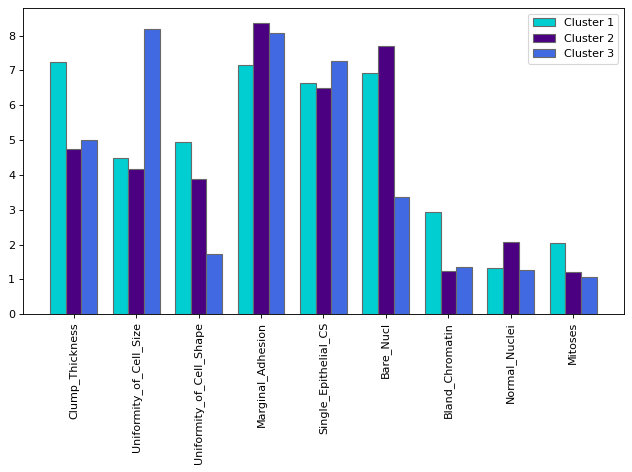

In [219]:
barWidth = 0.25
br1 = np.arange(len(df_t.columns))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.figure(figsize=(8, 6), dpi=80)

plt.bar(br1, centros_3[:,0], color = 'darkturquoise', width = barWidth, edgecolor ='dimgray', label ='Cluster 1')
plt.bar(br2, centros_3[:,1], color = 'indigo', width = barWidth, edgecolor ='dimgray', label ='Cluster 2')
plt.bar(br3, centros_3[:,2], color = 'royalblue', width = barWidth, edgecolor ='dimgray', label ='Cluster 3')
 
# Adding Xticks
#plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
#plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(df_t.columns))], df_t.columns, rotation=90)
plt.legend()
plt.tight_layout()

K menas - 4 clusters

In [238]:
kmeans_4 = KMeans(n_clusters=4).fit(X)

In [260]:
centros_4 = np.reshape(kmeans_4.cluster_centers_, (kmeans_4.cluster_centers_.shape[1], kmeans_4.cluster_centers_.shape[0]))

In [265]:
centros_4[:,0]

array([2.96162528, 2.05191874, 1.07900677, 7.81012658, 7.82278481,
       6.89230769, 5.47692308, 4.84375   , 9.27083333])

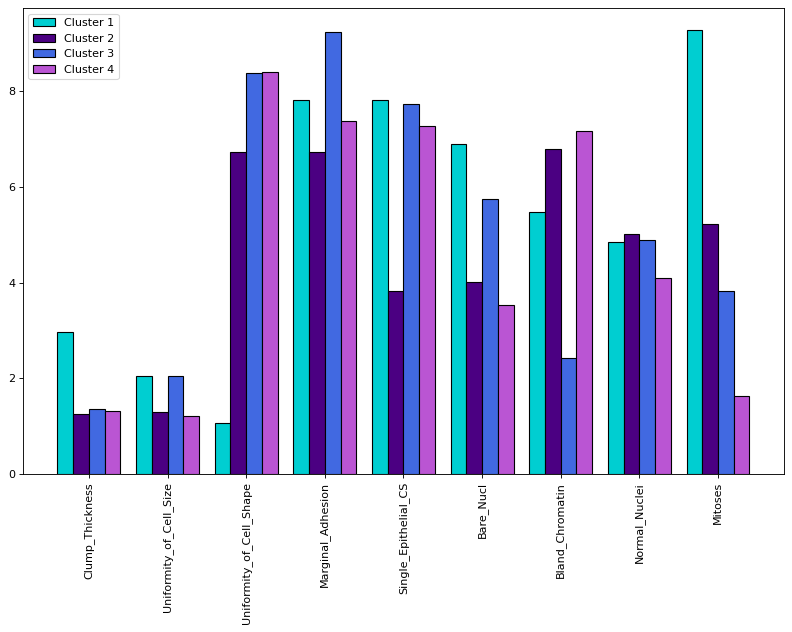

In [379]:
tic = np.arange(len(df_t.columns))
plt.figure(figsize=(10, 8), dpi=80)
w = 0
#color = {1: 'darkturquoise', 2: 'indigo', 3: 'royalblue', 4: 'mediumorchid'}
for n in range(centros_4.shape[1]):
    plt.bar(tic + w, centros_4[:,n], color = color[n+1], width = 0.20, edgecolor ='black', label= 'Cluster ' + str(n+1) )
    w = w + 0.20
#plt.bar(tic + 0.25, centros_4[:,1], color =  'indigo', width = 0.25, edgecolor ='dimgray')
#plt.bar(tic + 0.50, centros_4[:,2], color = 'royalblue', width = 0.25, edgecolor ='dimgray')
#plt.bar(tic + 0.75, centros_4[:,3], color = 'mediumorchid', width = 0.25, edgecolor ='dimgray')
plt.xticks(tic + 0.30, df_t.columns, rotation=90)
plt.legend()
plt.tight_layout()

In [305]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse[k] = kmeans.inertia_

Curva Cotovelo (elbow curve) - Verifica o numero otimo de clusters pela soma da do quadrado das distancias entre os pontos da amostra até o centro do agruamento mais próximo.

Text(0, 0.5, 'SQ')

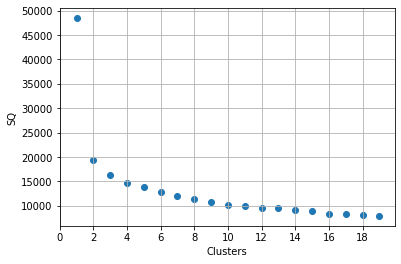

In [309]:
plt.scatter(list(sse.keys()), list(sse.values()))
plt.grid(True)
plt.xticks(range(0,20,2))
plt.xlabel("Clusters")
plt.ylabel("SQ")

Visualizando os agrupamentos

k = 2

In [19]:
kmeans_2t = KMeans(n_clusters=2)
labels_2 = kmeans_2t.fit_predict(df_trans)
centroides2 = kmeans_2t.cluster_centers_

In [20]:
np.unique(labels_2)

array([0, 1])

In [21]:
filtered_label0 = df_trans[labels_2 == 0]

In [22]:
filtered_label1 = df_trans[labels_2 == 1]

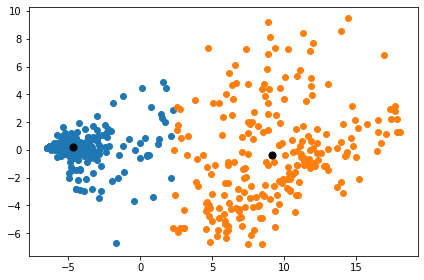

In [23]:
plt.scatter(filtered_label0[:,0], filtered_label0[:,1])
plt.scatter(filtered_label1[:,0], filtered_label1[:,1])
plt.scatter(centroides2[:,0], centroides2[:,1], s=50, color='black')
plt.tight_layout()

K = 3

In [25]:
kmeans_3t = KMeans(n_clusters=3)
labels_3 = kmeans_3t.fit_predict(df_trans)
centroides3 = kmeans_3t.cluster_centers_

In [364]:
#filtered_label30 = df_trans[labels_3 == 0]
#filtered_label31 = df_trans[labels_3 == 1]
#filtered_label32 = df_trans[labels_3 == 2]

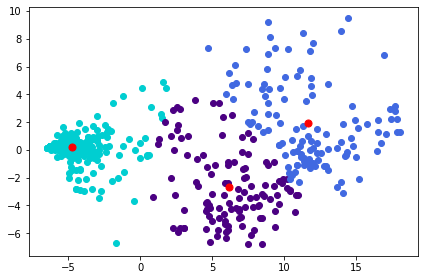

In [29]:
ul = np.unique(labels_3)
for i in ul:
    plt.scatter(df_trans[labels_3 == i , 0] , df_trans[labels_3 == i , 1] , label = i, color = color[i+1])
plt.scatter(centroides3[:,0], centroides3[:,1], s=50, color='red')
plt.tight_layout()  

In [30]:
kmeans_4t = KMeans(n_clusters=4)
labels_4 = kmeans_4t.fit_predict(df_trans)
centroides4 = kmeans_4t.cluster_centers_

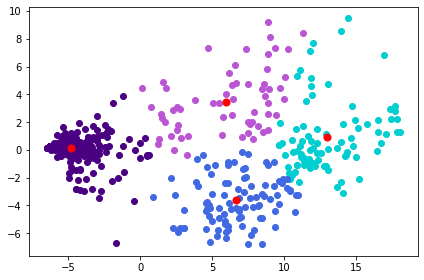

In [32]:
ul = np.unique(labels_4)
for i in ul:
    plt.scatter(df_trans[labels_4 == i , 0] , df_trans[labels_4 == i , 1] , label = i, color = color[i+1])
plt.scatter(centroides4[:,0], centroides4[:,1], s=50, color='red')
plt.tight_layout()   